# Rishabh Gupta

# Task -  Prediction usig unsupervised Learning 

In [1]:
#importing the required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
sns.set(style ='darkgrid')

In [2]:
#getting the data
data =pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\Iris.csv')

In [3]:
#peeking at the head of the data
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.info()
#all are non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Insights
a) SepallengthCm and sepalwidthcm appear to behave in a normal distribution (as  mean = 50% are approximately).

b) PetalLength and petalwidth are left skiwed (as mean <50% value)  , that is each variable seems to have frequent  occurence      of lower valeus)

In [6]:
#separating the x values
X = data.iloc[:,1:5] # id is a general number given to each row, so it is not a feature variable of each species

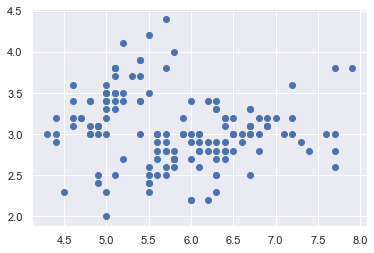

In [7]:
#visualizing any of the two variabls
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'])

# Finding the optimal number of clusters

In [8]:
clusters =np.arange(1,12) #clusters from 1 to 11
sse = []# sum of squared of inertia 
for x in clusters:
    km = KMeans(n_clusters =x,init ='k-means++',max_iter =300)
    km.fit(X)
    sse.append(km.inertia_)

In [9]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.95701115711987,
 34.2045677933178,
 30.37497544122546,
 28.25270346320348,
 26.22659343434345,
 24.840027389277374]

# Drawing the elbow plot : 
It shows the explained variance by each cluster, so we will choose the cluster where the explained varianced gets reduced by a
large extent

Text(0, 0.5, 'Inertia explaind by each cluster')

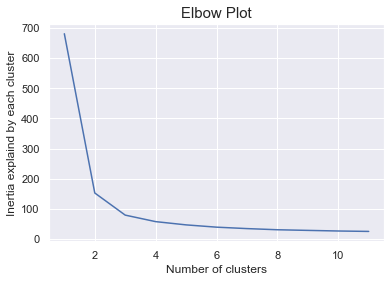

In [10]:

plt.plot(clusters,sse)
plt.title('Elbow Plot',fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia explaind by each cluster')

# 
Clusters to be choosen should be one resulting a very decrease in sum squared inertia after that .From the above elbow ,the number of clusters should be between 2 and 4. Let's choose k be 3.

In [11]:
# Creating a k means model with k =3
km = KMeans(n_clusters =3,init='k-means++',max_iter=300).fit(X)
np.unique(km.labels_,return_counts=True)


(array([0, 1, 2]), array([62, 50, 38], dtype=int64))

#
(0,1,2) are the labels assigned to each X with 0 with the least frequency

In [12]:
#centroids
km.cluster_centers_
# these 3 are the centroids of each cluster

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [13]:
X['labels'] = km.labels_

In [14]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Visualization with the help of clusters

Text(0.5, 1.0, 'Visualization -1 ')

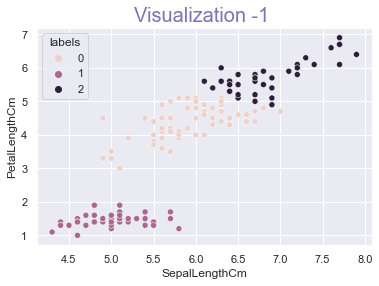

In [15]:
#1)
sns.scatterplot(x= 'SepalLengthCm',y ='PetalLengthCm',data =X,hue='labels')
plt.xlabel('SepalLengthCm',fontsize =12)
plt.ylabel('PetalLengthCm',fontsize=12)
plt.title("Visualization -1 ",fontsize=20,c='m')

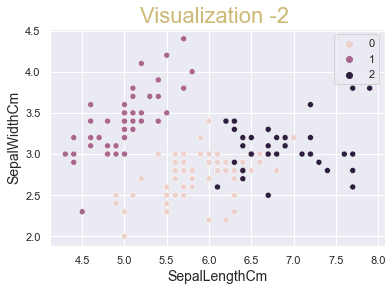

In [16]:
#2) Another visualization
sns.scatterplot(x= 'SepalLengthCm',y ='SepalWidthCm',data =X,hue='labels')
plt.xlabel('SepalLengthCm',fontsize =14)
plt.ylabel('SepalWidthCm',fontsize=14)
plt.title("Visualization -2 ",fontsize=22,c='y')
plt.legend(loc='upper right')

# Conclusion
Each visualization showcases the well-separated clusters. So, the model is able to able to discover patterns amongst the feature variables without taking any guidance of the label data (that is Y which is species in the given case) 

# Thanks